# Avoiding Fish Fries at All Cost
### With Haiden Hunter


Datasets: [Pittsburgh Fish Fry Locations](https://data.wprdc.org/dataset/pittsburgh-fish-fry-map)

![alt text](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeHk2eDcxdWIxbDNpM3RtdGl2emd5eHdxNjZqbTJkNHhybzZqeWs1aCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/13U2NlgRx3QvMQ/giphy.gif)

In [9]:
# Ok... I decided to throw every possible import I could need here.
# I'd rather have it and not use it all that much then forget about it and never use it.
import pandas as pd
import fpsnippets
import matplotlib.pyplot as plt

#Lets load in all of the fish fry data from 2019 to 2023 and merge them into one dataset to clean up.
fishFryData2023 = pd.read_csv("https://data.wprdc.org/datastore/dump/511a29f6-3217-4f61-a9ba-b3b5b35ab5fb")
fishFryData2022 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/f4d7e81a-ac39-4f84-a249-c68524e8258a/download/2022_pittsburgh_fish_fry_locations.csv")
fishFryData2021 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/dfa58a5b-d221-411f-bd7e-32837ff99993/download/2021_pittsburgh_fish_fry_locations.csv")
fishFryData2020 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/d802d628-bd44-47cc-bbc9-c691f9026ca1/download/2020_pittsburgh_fish_fry_locations.csv")
fishFryData2019 = pd.read_csv("https://data.wprdc.org/dataset/682daad1-6d3a-45d3-8710-6c961146e19b/resource/5b58c467-8e6a-4abc-9dd5-a39881770b3c/download/2019_pittsburgh_fish_fry_locations.csv")

# Merging data.
fishFryData = pd.concat([fishFryData2023, fishFryData2022, fishFryData2021, fishFryData2020, fishFryData2019]).reset_index()
fishFryData.head(3)

,index,_id,validated,venue_name,venue_type,venue_address,website,events,etc,menu_url,menu_text,venue_notes,phone,email,homemade_pierogies,take_out,alcohol,lunch,handicap,publish,id,latitude,longitude
0,0,8680.0,t,"St. Peter Church, St. Faustina Parish",Church,"670 South Main Street, Slippery Rock, Pennsylvania 16057, United States",https://stfaustinaparish.org/,"Friday Feb 24 from 4:00 PM to 7:00 PM, Friday Mar 3 from 4:00 PM to 7:00 PM, Friday Mar 10 from 4:00 PM to 7:00 PM, Friday Mar 17 from 4:00 PM to 7:00 PM, Friday Mar 24 from 4:00 PM to 7:00 PM, Friday Mar 31 from 4:00 PM to 7:00 PM",NaN,https://stfaustinaparish.org/,"$12 per meal, \nALL YOU CAN EAT $18\nKids under 12 are $6",NaN,724-794-2880,NaN,NaN,t,NaN,f,NaN,t,NaN,41.056430,-80.050690
1,1,8681.0,f,Hartford Heights Volunteer Fire Department,Fire Department,"14335 U.S. 30, Irwin, PA 15642",https://www.facebook.com/Hartford-Heights-VFD-336938100039050/,"Friday Feb 24 from 4:00 PM to 8:00 PM, Friday Mar 3 from 4:00 PM to 8:00 PM, Friday Mar 10 from 4:00 PM to 8:00 PM, Friday Mar 17 from 4:00 PM to 8:00 PM, Friday Mar 24 from 4:00 PM to 8:00 PM, Friday Mar 31 from 4:00 PM to 8:00 PM",NaN,NaN,NaN,NaN,412-824-9972,NaN,f,t,NaN,f,NaN,f,NaN,40.352969,-79.767295
2,2,8682.0,t,"Our Lady of Joy Church, Holy Family Parish",Church,"2000 O'Block Road Holiday Park, PA",https://holyfamilypgh.org/,"Wednesday Feb 22 from 4:00 PM to 7:00 PM, Friday Feb 24 from 4:00 PM to 7:00 PM, Friday Mar 3 from 4:00 PM to 7:00 PM, Friday Mar 10 from 4:00 PM to 7:00 PM, Friday Mar 17 from 4:00 PM to 7:00 PM, Friday Mar 24 from 4:00 PM to 7:00 PM, Friday Mar 31 from 4:00 PM to 7:00 PM, Friday Apr 7 from 4:00 PM to 7:00 PM",NaN,chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://files.ecatholic.com/24616/documents/2023/3/March%205%202023%20FROM%20LPI.pdf?t=1677768857000,"Hand breaded fish dinner $14 includes fries, slaw, bun, dessert, beverage",NaN,412-828-9846,NaN,NaN,t,NaN,f,NaN,t,NaN,40.480007,-79.719563


In [10]:
# Removing nonessential columns.
fishFryData = fishFryData[['validated', 'venue_name', 'latitude', 'longitude']]
fishFryData.head(3)

,validated,venue_name,latitude,longitude
0,t,"St. Peter Church, St. Faustina Parish",41.056430,-80.050690
1,f,Hartford Heights Volunteer Fire Department,40.352969,-79.767295
2,t,"Our Lady of Joy Church, Holy Family Parish",40.480007,-79.719563


In [11]:
# Sorting through valid Pittsburgh neighborhoods.
# If valid, it will be added to the final list of neighborhoods.
finalFishFryData = pd.DataFrame()

for x, row in fishFryData.iterrows():
    neighborhood = fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])
    if neighborhood != None:
        if ((row["validated"]) == "t") or ((row["validated"]) == True):
            finalFishFryData = pd.concat([finalFishFryData, pd.DataFrame([{'Neighborhood':neighborhood}])])

finalFishFryData = finalFishFryData.reset_index(drop=True)

finalFishFryData.head(3)

,Neighborhood
0,Central Lawrenceville
1,Windgap
2,Point Breeze North


In [26]:
# Counting fish fries through a new list of all the neighborhoods is Pittsburgh.
listOfHoods = pd.read_csv("https://data.wprdc.org/datastore/dump/668d7238-cfd2-492e-b397-51a6e74182ff")
listOfHoods = listOfHoods[['hood']]
neighborhoodFishFrys = pd.DataFrame(columns=["Neighborhood", "Number of Fish Fries"])

for index, row in listOfHoods.iterrows():
    hood = row["hood"]
    count = 0
    for index2, row2 in finalFishFryData.iterrows():
        if hood == row2["Neighborhood"]:
            count = count + 1
    neighborhoodFishFrys = pd.concat([neighborhoodFishFrys, pd.DataFrame([{'Neighborhood':hood, 'Number of Fish Fries':count}])])

# Sorting values and reindexing for display purposes.
neighborhoodFishFrys = neighborhoodFishFrys.sort_values(by=['Number of Fish Fries'], ascending=False).reset_index(drop=True)

# Adjusting pandas display settings.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Displaying our final chart!
topFishData = neighborhoodFishFrys.head(5)
neighborhoodFishFrys.head(5)

,Neighborhood,Number of Fish Fries
0,South Side Flats,22
1,Central Business District,15
2,Elliott,9
3,Strip District,8
4,East Allegheny,8


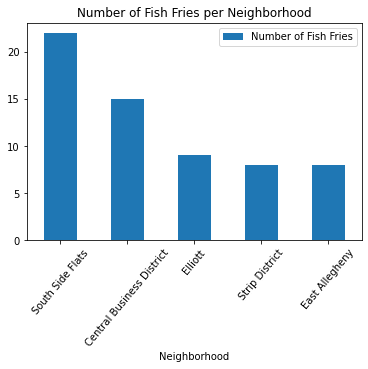

In [27]:
topFishData.plot.bar(x="Neighborhood", y="Number of Fish Fries", title="Number of Fish Fries per Neighborhood", rot="50")

#### Why not delete duplicates?

At first I was planning on removing them. As when compiling multiple years of data, I was worried about the clutter caused by reoccuring fish fries. However, I realized that it may be benefitial to keep the reoccuring fish fries. As it verifies whether or not it was a one off fish fry or a community staple.

## The neighborhood you most want to avoid is the *South Side Flats*.

This was an intresting data set to work with, as the goal became to find something that you would want to avoid. The final data set makes it pretty clear that there are a few key neighborhoods you want to avoid as well as the South Side, such as Elliott and the Buisness District. However, it does not make a clear argument for any of the neighborhoods with zero fish fries. This makes the fish fry data set excellent for crossing out a few options. Yet, we will now turn to other data sets to conclusivly decide what the *best* neightborhood will be to walk your fish.